# Sprint 16.2. 
## Web scraping

#### Descripció

Aprèn a realitzar web scraping.

## Nivell 1
### Exercici 1

Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.



In [1]:
import pandas as pd
import time

from bs4 import BeautifulSoup
import requests
from selenium import webdriver
from selenium.webdriver import Firefox
from selenium.webdriver.common.keys import Keys

from selenium.webdriver.firefox.options import Options

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC

Queremos descargar los valores del índice IBEX35 del último año. Para ello vamos a buscar la información en la página web de la bolsa de madrid


[bolsa de madrid]: https://www.bolsamadrid.es/

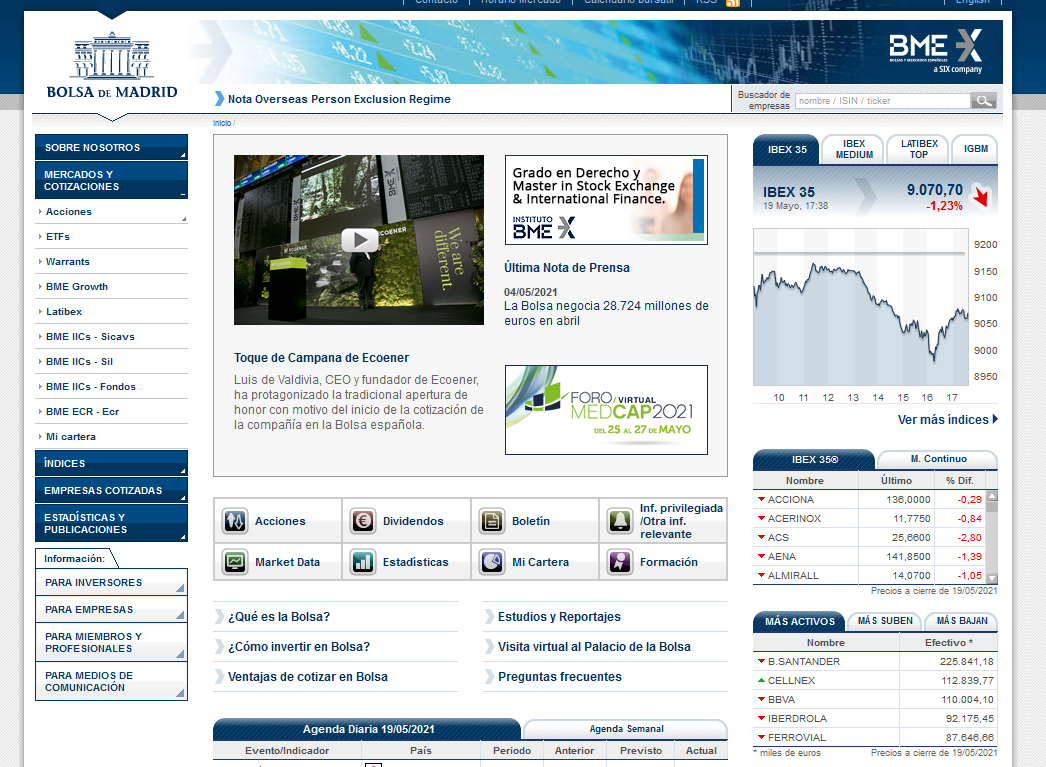

In [2]:
# Instancio opciones navegador
opciones=Options()
opciones.load_strategy='normal'
#opciones.headless = True

# Instacion navegador
navegador=Firefox(options=opciones)
# Fijar el tamaño de la pantalla (de esta manera evito que el mensaje de información de las cookies no 
# deje clickar alguna pestaña)
navegador.set_window_size(1280, 1600)

# Cargo url en el navegador
navegador.get('https://www.bolsamadrid.es')

Si queremos consultar los valores históricos debemos abrir la pestaña **ÍNDICES** y a continuación **Ìndices IBEX** y **Precios históricos**.

In [3]:
# Abrir la primera pestaña (INDICES) 

# Puedo acceder a la pestaña INDICES por xpath, css_locator o partial_link_text

#navegador.find_element_by_xpath('/html/body/div[1]/table/tbody/tr[4]/td[1]/div/div[1]/div[5]').click()

navegador.find_elements_by_partial_link_text('ÍNDICES')[0].click()


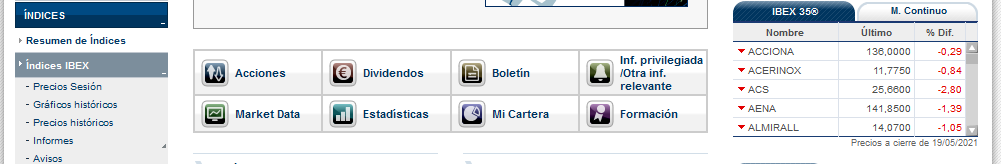

In [4]:
# Abrir la segunda pestaña (Indices IBEX)
# Igualmente puedo acceder por diversos métodos
#navegador.find_element_by_xpath('/html/body/div[1]/table/tbody/tr[4]/td[1]/div/div[1]/div[6]/div[2]').click()

# Instancia espera explicita
wait=WebDriverWait(navegador,5)

indices_IBEX=wait.until(EC.element_to_be_clickable((By.PARTIAL_LINK_TEXT,'Índices IBEX')))
indices_IBEX.click()

Entramos en la página de precios históricos.

In [5]:
# Acceso a página precios históricos
#navegador.find_element_by_xpath('/html/body/div[1]/table/tbody/tr[4]/td[1]/div/div[1]/div[6]/div[3]/div[3]')

precios_historicos=wait.until(EC.element_to_be_clickable((By.PARTIAL_LINK_TEXT,'Precios históricos')))
precios_historicos.click()

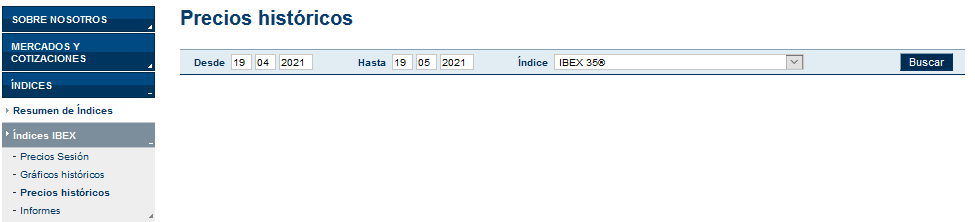

Una vez en esta página hay que introducir los periodos en los que estoy interesado. El formulario solo nos deja recuperar los últimos 365 días.

In [6]:
# Fecha desde tiene tres elementos, dia mes y año. Accedo por id.

time.sleep(3)

#dia - id=ctl00_Contenido_Desde_Dia
dia=navegador.find_element_by_id('ctl00_Contenido_Desde_Dia')
dia.send_keys(Keys.BACKSPACE*2+'1')
#dia.submit()
# Mes - id=ctl00_Contenido_Desde_Mes
mes=navegador.find_element_by_id('ctl00_Contenido_Desde_Mes')
mes.send_keys(Keys.BACKSPACE*2+'1')
#mes.submit()
# Año - idctl00_Contenido_Desde_Año
anio=navegador.find_element_by_id('ctl00_Contenido_Desde_Año')
anio.send_keys(Keys.BACKSPACE*4+'2019')
#anio.submit()

In [7]:
# Buscar valores
time.sleep(3)

buscar=navegador.find_element_by_id('ctl00_Contenido_Buscar')
buscar.click()

Una vez introducida la fecha y pulsado el botón buscar obtengo una tabla con los valores del último año.

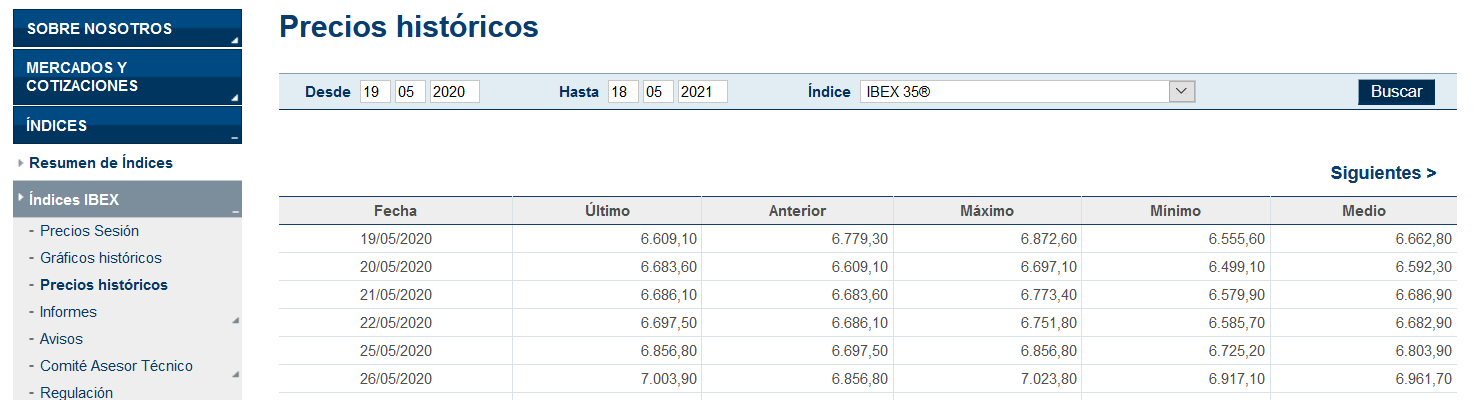

La tabla contiene la información de un mes. Tendremos que guardar los valores de ese periodo y cargar el siguiente periodo con el botón **Siguientes**. 

In [8]:
# La tabla se encuentra en el elemento con id=ctl00_Contenido_tblDatos
# Para extraer el texto empleo la función text, obtengo una cadena que puedo convertir en lista
# con split.

wait.until(EC.visibility_of_all_elements_located((By.ID,'ctl00_Contenido_tblDatos')))

tabla=navegador.find_element_by_id('ctl00_Contenido_tblDatos').text.split('\n')
tabla[:5]

['Fecha Último Anterior Máximo Mínimo Medio',
 '08/06/2020 7.896,10 7.872,60 7.992,70 7.796,60 7.908,60',
 '09/06/2020 7.752,30 7.896,10 7.914,70 7.683,20 7.763,30',
 '10/06/2020 7.663,90 7.752,30 7.861,00 7.649,40 7.749,40',
 '11/06/2020 7.278,00 7.663,90 7.486,50 7.278,00 7.394,00']

In [9]:
# Programo un bucle while. Mientras Selenium encuentre el botón siguiente ejecuto:
# Para dos segundos para que se cargue la tabla guardo los datos en una lista y los añado a la tabla
# Cuando salta un error, capturo la excepción y termino el bucle 

n='ok'
while n=='ok':
    try:
        # Selecciono boton "siguientes" y pulso 
        siguientes=navegador.find_element_by_id('ctl00_Contenido_SiguientesArr')
        siguientes.click()
        
        # Parada 2 segundos
        # time.sleep(2)
        navegador.implicitly_wait(2)
        
        # Captura tabla 
        nueva=navegador.find_element_by_id('ctl00_Contenido_tblDatos')
        nueva_tabla=nueva.text.split('\n')
        tabla=tabla+nueva_tabla[1:]
        
    except:
        n='fin'
        print('Se ha llegado al final de la lista')
        
tabla   


Se ha llegado al final de la lista


['Fecha Último Anterior Máximo Mínimo Medio',
 '08/06/2020 7.896,10 7.872,60 7.992,70 7.796,60 7.908,60',
 '09/06/2020 7.752,30 7.896,10 7.914,70 7.683,20 7.763,30',
 '10/06/2020 7.663,90 7.752,30 7.861,00 7.649,40 7.749,40',
 '11/06/2020 7.278,00 7.663,90 7.486,50 7.278,00 7.394,00',
 '12/06/2020 7.292,70 7.278,00 7.425,30 7.205,00 7.330,40',
 '15/06/2020 7.259,30 7.292,70 7.309,40 7.062,90 7.170,90',
 '16/06/2020 7.495,30 7.259,30 7.599,30 7.349,70 7.465,10',
 '17/06/2020 7.478,70 7.495,30 7.552,50 7.402,50 7.486,30',
 '18/06/2020 7.390,20 7.478,70 7.495,20 7.318,10 7.399,20',
 '19/06/2020 7.414,20 7.390,20 7.502,10 7.401,00 7.450,50',
 '22/06/2020 7.345,70 7.414,20 7.426,90 7.300,70 7.352,00',
 '23/06/2020 7.438,40 7.345,70 7.495,10 7.366,60 7.446,90',
 '24/06/2020 7.195,50 7.438,40 7.440,90 7.195,50 7.313,50',
 '25/06/2020 7.270,30 7.195,50 7.295,80 7.077,80 7.203,80',
 '26/06/2020 7.178,40 7.270,30 7.344,90 7.172,10 7.277,20',
 '29/06/2020 7.278,10 7.178,40 7.318,30 7.146,30 7.220

In [10]:
# Nombres de las columnas para pasarlos al dataframe
nombres=tabla[0].split(' ')
nombres

['Fecha', 'Último', 'Anterior', 'Máximo', 'Mínimo', 'Medio']

In [11]:
# Convierto lista en dataframe
IBEX=pd.DataFrame(tabla[1:])[0].str.split(' ',expand=True)
IBEX.columns=nombres
IBEX

,Fecha,Último,Anterior,Máximo,Mínimo,Medio
0,08/06/2020,"7.896,10","7.872,60","7.992,70","7.796,60","7.908,60"
1,09/06/2020,"7.752,30","7.896,10","7.914,70","7.683,20","7.763,30"
2,10/06/2020,"7.663,90","7.752,30","7.861,00","7.649,40","7.749,40"
3,11/06/2020,"7.278,00","7.663,90","7.486,50","7.278,00","7.394,00"
4,12/06/2020,"7.292,70","7.278,00","7.425,30","7.205,00","7.330,40"
...,...,...,...,...,...,...
252,01/06/2021,"9.189,70","9.148,90","9.226,80","9.137,20","9.188,30"
253,02/06/2021,"9.180,70","9.189,70","9.216,00","9.152,00","9.183,30"
254,03/06/2021,"9.142,40","9.180,70","9.189,40","9.086,60","9.139,00"
255,04/06/2021,"9.088,30","9.142,40","9.158,80","9.071,20","9.100,50"


In [12]:
IBEX.to_csv('IBEX_20210519.csv',index=False)

In [13]:
# Cierro sesión
navegador.close()

## Nivell 2

### Exercici 2

Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.



In [14]:
import pandas_profiling as pp

In [15]:
ibex = pd.read_csv('IBEX_20210519.csv',
                   parse_dates = [0])

In [16]:
ibex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Fecha     257 non-null    datetime64[ns]
 1   Último    257 non-null    object        
 2   Anterior  257 non-null    object        
 3   Máximo    257 non-null    object        
 4   Mínimo    257 non-null    object        
 5   Medio     257 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 12.2+ KB


In [21]:
ibex.head()

,Fecha,Último,Anterior,Máximo,Mínimo,Medio
0,2020-08-06,7896.1,7872.6,7992.7,7796.6,7908.6
1,2020-09-06,7752.3,7896.1,7914.7,7683.2,7763.3
2,2020-10-06,7663.9,7752.3,7861.0,7649.4,7749.4
3,2020-11-06,7278.0,7663.9,7486.5,7278.0,7394.0
4,2020-12-06,7292.7,7278.0,7425.3,7205.0,7330.4


In [17]:
ibex.columns[1:]

Index(['Último', 'Anterior', 'Máximo', 'Mínimo', 'Medio'], dtype='object')

In [18]:
# Variables a convertir
indices = ibex.columns[1:]

for variable in indices:
    ibex[variable] = ibex[variable].str.replace('.','',regex = True).str.replace(',','.',regex = True).astype(float)

Sobre el dataset:

Este dataset contiene los valores de los indices del IBEX 35 del último año.

Los atributos del dataset son:

```
    Fecha: Fecha de la sesión
    Último: Valor del índice al cierre de la sesión.
    Anterior: Valor del índice al cierre de la sesión del día anterior.
    Máximo: Valor máximo registrado en esa sesión.
    Mínimo: Valor mínimo registrado en esa sesión.
    Medio: Valor medio de esa sesión.
   
```
    
A continuación se adjunta un resumen estadístico.

In [19]:
pp.ProfileReport(ibex, title = 'Resumen estadítico sesiones IBEX',explorative = True).to_notebook_iframe()

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]


## Nivell 3
### Exercici 3

Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 